In [1]:
import sys 
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor
from sympy import *

In [3]:
%load_ext autoreload
%autoreload 2
from relation import Distribution
from relation import Analysis

In [4]:
a = Analysis([62.5,15],'022','b')

In [5]:
df = a.get_dataframe()

In [6]:
train_df, test_df = train_test_split(df, train_size=0.3, random_state=42)

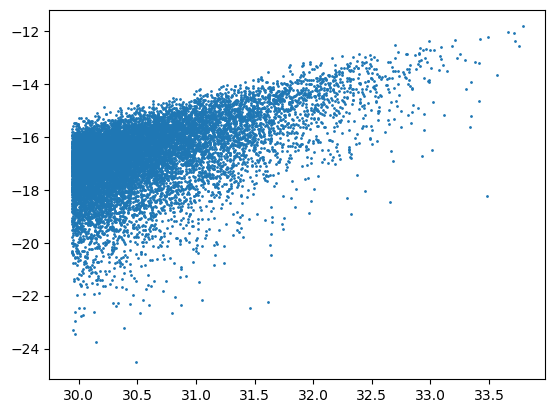

In [7]:
plt.scatter(train_df['M'],train_df['Y'],s=1)

In [8]:
def get_inp(features):
    xlen = len(features[0])
    ylen = len(features)
    inp = np.zeros((xlen,ylen))
    for i in range(len(features)):
        inp[:,i] = features[i]
    return inp

In [9]:
inp1 = get_inp([train_df['M']*1.2])
inp2 = get_inp([np.log(train_df['Mstar'])])
inp3 = get_inp([np.log(train_df['Mstar']),train_df['galaxy_number_density']])

In [10]:
Y = train_df['Y']

In [11]:
regr = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=50,n_jobs=-1)
regr.fit(inp1, Y)

RandomForestRegressor(max_depth=50, n_estimators=50, n_jobs=-1, random_state=0)

In [12]:
Y_prime = Y/regr.predict(inp1)

In [13]:
regr2 = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=50,n_jobs=-1)
regr2.fit(inp2, Y_prime)

RandomForestRegressor(max_depth=50, n_estimators=50, n_jobs=-1, random_state=0)

In [14]:
regr3 = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=50,n_jobs=-1)
regr3.fit(inp3, Y_prime)

RandomForestRegressor(max_depth=50, n_estimators=50, n_jobs=-1, random_state=0)

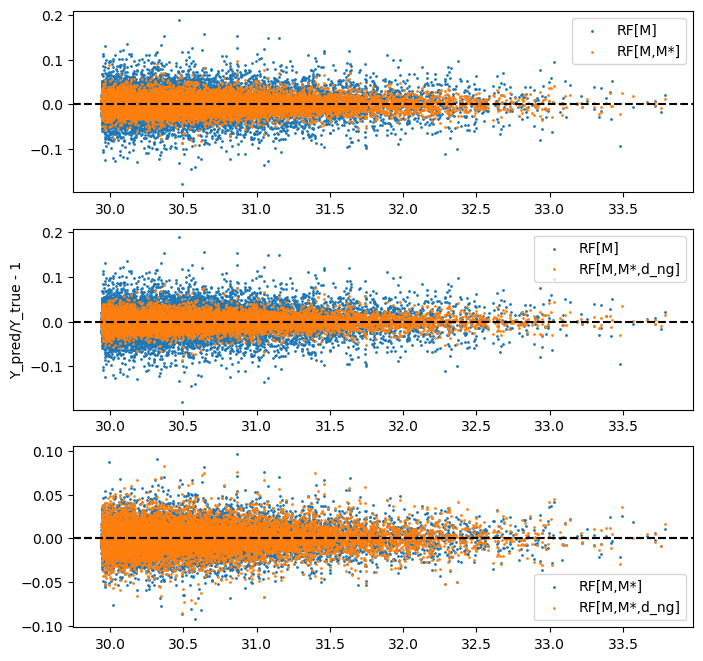

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.scatter(train_df['M'],regr.predict(inp1)/Y -1,s=1,label='RF[M]')
plt.scatter(train_df['M'],regr.predict(inp1)*regr2.predict(inp2)/Y -1,s=1,label='RF[M,M*]')
plt.axhline(0,c='k',ls='--')
plt.legend()
plt.subplot(3,1,2)
plt.scatter(train_df['M'],regr.predict(inp1)/Y -1,s=1,label='RF[M]')
plt.scatter(train_df['M'],regr.predict(inp1)*regr3.predict(inp3)/Y -1,s=1,label='RF[M,M*,d_ng]')
plt.legend()
plt.ylabel('Y_pred/Y_true - 1')
plt.axhline(0,c='k',ls='--')
plt.subplot(3,1,3)
plt.axhline(0,c='k',ls='--')
plt.scatter(train_df['M'],regr.predict(inp1)*regr2.predict(inp2)/Y -1,s=1,label='RF[M,M*]')
plt.scatter(train_df['M'],regr.predict(inp1)*regr3.predict(inp3)/Y -1,s=1,label='RF[M,M*,d_ng]')
plt.legend()
plt.axhline(0,c='k',ls='--')


In [116]:
inp_1 = get_inp([train_df['M']*1.2])
inp_2 = get_inp([np.log(train_df['Mstar'])])
inp_3 = get_inp([np.log(train_df['Mstar']),train_df['galaxy_number_density']])
inp_4 = get_inp([train_df['galaxy_number_density']])

In [117]:
model = PySRRegressor(
    niterations=20,
    maxsize=10,
    maxdepth=10,
    binary_operators=["+", "-", "*", "/",'pow',],
    unary_operators=["neg","exp","log","sqrt",],
    procs=4,
    model_selection="best",)
model.fit(inp_1,Y,weights=train_df['M']**.5)

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 4.050e+04
Head worker occupation: 4.6%
Progress: 112 / 300 total iterations (37.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.989e+00  1.738e-06  -16.73482
3           1.328e+00  2.019e-01  (x0 - 53.485783)
5           1.321e+00  2.661e-03  ((x0 * 1.1150154) - 57.7127)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.070e+04
Head worker occupation: 3.3%
Progress: 225 / 300 total iterations (75.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           1.989e+00  1.738e-06  -16.73482
3           1.328e+00  2.019e-01  (x0 + -53.485886)
5           1.321e+00  2.660e-03  ((x0 * 1.1150154) - 57.7127)

Press 'q' and then <enter> to stop execution early.


PySRRegressor.equations_ = [
	   pick     score                      equation      loss  complexity
	0        0.000000                     -16.73482  1.988689           1
	1  >>>>  0.201903             (x0 + -53.485886)  1.327994           3
	2        0.002660  ((x0 * 1.1150154) - 57.7127)  1.320946           5
]

In [118]:
Y_primes = Y/train_df['M']*1.2

In [119]:
model1 = PySRRegressor(
    niterations=20,
    maxsize=10,
    maxdepth=10,
    binary_operators=["+", "-", "*", "/",'pow',],
    unary_operators=["neg","exp","log","sqrt",],
    procs=4,
    model_selection="best",)
model1.fit(inp_2,Y_primes,weights=train_df['M']**.5)

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 3.810e+04
Head worker occupation: 1.8%
Progress: 105 / 300 total iterations (35.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.971e-03  8.207e-07  -0.6566003
3           3.069e-03  1.288e-01  (-18.0227 / x0)
5           2.283e-03  1.479e-01  ((-56.720783 / x0) + 1.4115885)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 3.720e+04
Head worker occupation: 1.9%
Progress: 206 / 300 total iterations (68.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.971e-03  8.207e-07  -0.6566003
3           3.069e-03  1.288e-01  (-18.022705 / x0)
5           2.283e-03  1.479e-01  ((-56.720783 / x0) + 1.4115885)
6           2.281e-03  8.535e-04  ((-22.576365 / log(x0)) + 6.160871)

Press 'q' and then <enter> to stop execution early.


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                         -0.6566003   
	1        0.128842                                  (-18.022434 / x0)   
	2  >>>>  0.147903                    ((-56.720783 / x0) + 1.4115885)   
	3        0.003613            ((neg(x0) * -0.073673055) + -2.6784375)   
	4        0.000058  ((neg(x0 + 0.0067914985) * -0.073673055) + -2....   
	
	       loss  complexity  
	0  0.003971           1  
	1  0.003069           3  
	2  0.002283           5  
	3  0.002275           6  
	4  0.002275           8  
]

In [120]:
model2 = PySRRegressor(
    niterations=20,
    maxsize=10,
    maxdepth=10,
    binary_operators=["+", "-", "*", "/",'pow',],
    unary_operators=["neg","exp","log","sqrt",],
    procs=4,
    model_selection="best",)
model2.fit(inp_4,Y_primes,weights=train_df['M']**.5)

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 3.600e+04
Head worker occupation: 2.1%
Progress: 101 / 300 total iterations (33.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.971e-03  8.207e-07  -0.6566003
5           3.518e-03  3.031e-02  ((0.97795814 ^ x0) * -0.69947654)
6           3.518e-03  1.025e-05  (sqrt(0.95676637 ^ x0) * -0.6991501)
8           3.518e-03  8.936e-08  (sqrt(0.95676637 ^ exp(log(x0))) * -0.6991501)
9           3.517e-03  2.922e-04  ((0.97795814 ^ (x0 - (0.114685036 ^ x0))) * -0.69947654)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 3.440e+04
Head worker occupation: 1.8%
Progress: 192 / 300 total iterations (64.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.971e-03  8.207e-07  -0.6566003
5           3.518e-03  3.031e-02  (-0.69944775 * (0.97796756 ^ x0))
6           3.518e-03  9.716e-06  ((sqrt(0.95676637) ^ x0) * 

PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                         -0.6566003   
	1  >>>>  3.030701e-02                  (-0.69944775 * (0.97796756 ^ x0))   
	2        9.749959e-06             ((sqrt(0.95676637) ^ x0) * -0.6991501)   
	3        1.137027e-07       (((0.907292 ^ x0) ^ 0.2274453) * -0.6991498)   
	4        1.461009e-04  ((0.97795814 ^ (x0 - (0.114685036 ^ x0))) * -0...   
	5        4.436970e-04  ((0.97795814 ^ log(exp(x0) + log(x0))) * -0.69...   
	
	       loss  complexity  
	0  0.003971           1  
	1  0.003518           5  
	2  0.003518           6  
	3  0.003518           7  
	4  0.003517           9  
	5  0.003515          10  
]

In [121]:
model3 = PySRRegressor(
    niterations=20,
    maxsize=10,
    maxdepth=10,
    binary_operators=["+", "-", "*", "/",'pow',],
    unary_operators=["neg","exp","log","sqrt",],
    procs=4,
    model_selection="best",)
model3.fit(inp_3,Y_primes,weights=train_df['M']**.5)

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 3.720e+04
Head worker occupation: 2.6%
Progress: 103 / 300 total iterations (34.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.971e-03  8.207e-07  -0.6566003
3           3.069e-03  1.288e-01  (-18.022705 / x0)
5           2.283e-03  1.479e-01  ((-56.734055 / x0) + 1.4120746)
6           2.281e-03  8.552e-04  ((-22.573648 / log(x0)) - -6.1600475)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.260e+04
Head worker occupation: 2.5%
Progress: 236 / 300 total iterations (78.667%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.971e-03  8.207e-07  -0.6566003
3           3.069e-03  1.288e-01  (-18.022438 / x0)
5           2.283e-03  1.479e-01  ((-56.69006 / x0) + 1.4104681)
6           2.281e-03  8.551e-04  ((-22.588757 / log(x0)) + 6.1646194)
9           2.258e-03  3.385e-03  (((-56.727425 - (0.5097451 /

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                         -0.6566003   
	1        0.128842                                  (-18.022438 / x0)   
	2  >>>>  0.147902                     ((-56.69006 / x0) + 1.4104681)   
	3        0.000855               ((-22.588757 / log(x0)) + 6.1646194)   
	4        0.000107     ((-21.539791 / exp(log(sqrt(x0)))) + 3.456258)   
	5        0.009974  (((-56.695484 - (0.5096945 / x1)) / x0) + 1.41...   
	
	       loss  complexity  
	0  0.003971           1  
	1  0.003069           3  
	2  0.002283           5  
	3  0.002281           6  
	4  0.002281           8  
	5  0.002258           9  
]

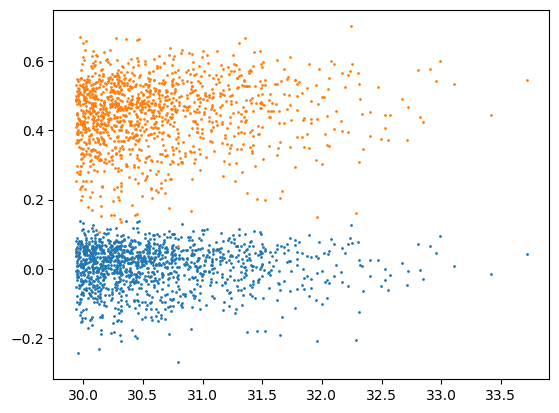

In [126]:
plt.scatter(train_df['M'],model.predict(inp1,2)/Y -1,s=1,label='PySR[M]')
#plt.scatter(train_df['M'],train_df['M']*1.2*model1.predict(inp2)/Y -1,s=1,label='PySR[M,M*]')
#plt.scatter(train_df['M'],train_df['M']*1.2*model2.predict(inp_4)/Y -1,s=1,label='PySR[M,d_ng]')
plt.scatter(train_df['M'],train_df['M']*1.2*model3.predict(inp_3)/Y -1,s=1,label='PySR[M,M*,d_ng]')